In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv(r"C:\Users\Jaivansh Chawla\Documents\COLLEGE\3 YEAR\5 sem\ML\ML LAB\LAB 9\UCI_HAR_dataset.csv")

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)

Dataset Loaded Successfully!
Shape: (2947, 563)


In [59]:
target_column = df.columns[-1]  
print(f"\nUsing '{target_column}' as target column")
X = df.drop(target_column, axis=1)
y = df[target_column]
print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")


Using 'Activity' as target column
Features Shape: (2947, 562)
Target Shape: (2947,)


In [60]:
X = pd.get_dummies(X, drop_first=True)
print(f"Features after encoding: {X.shape}")

Features after encoding: (2947, 562)


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training Set Size: {X_train.shape}")
print(f"Test Set Size: {X_test.shape}")

Training Set Size: (2062, 562)
Test Set Size: (885, 562)


RANDOM FOREST

In [62]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
print("Random Forest Model Training Complete!")
y_pred_rf = model_rf.predict(X_test)
print("Predictions Generated!")


Random Forest Model Training Complete!
Predictions Generated!


In [73]:
print("RANDOM FOREST ACCURACY:", accuracy_score(y_test, y_pred_rf))
print("\nRANDOM FOREST CLASSIFICATION REPORT:\n", classification_report(y_test, y_pred_rf))

RANDOM FOREST ACCURACY: 0.9751412429378531

RANDOM FOREST CLASSIFICATION REPORT:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       170
           SITTING       0.99      0.93      0.96       152
          STANDING       0.92      0.99      0.95       137
           WALKING       0.99      0.99      0.99       154
WALKING_DOWNSTAIRS       0.98      0.95      0.97       123
  WALKING_UPSTAIRS       0.97      0.99      0.98       149

          accuracy                           0.98       885
         macro avg       0.97      0.97      0.97       885
      weighted avg       0.98      0.98      0.98       885



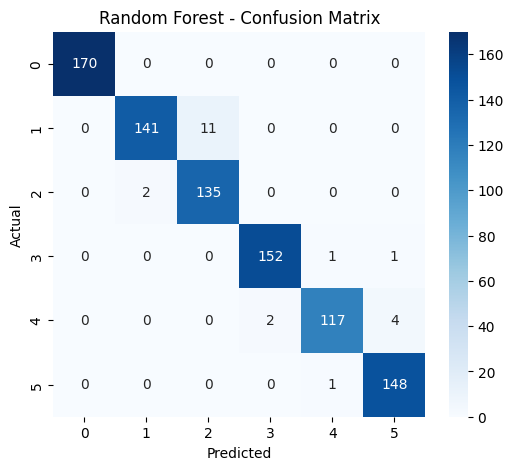

In [64]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\Jaivansh Chawla\AppData\Local\Temp\ipykernel_5428\2783788893.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_importances,y=top_features,palette="viridis",orient="h")


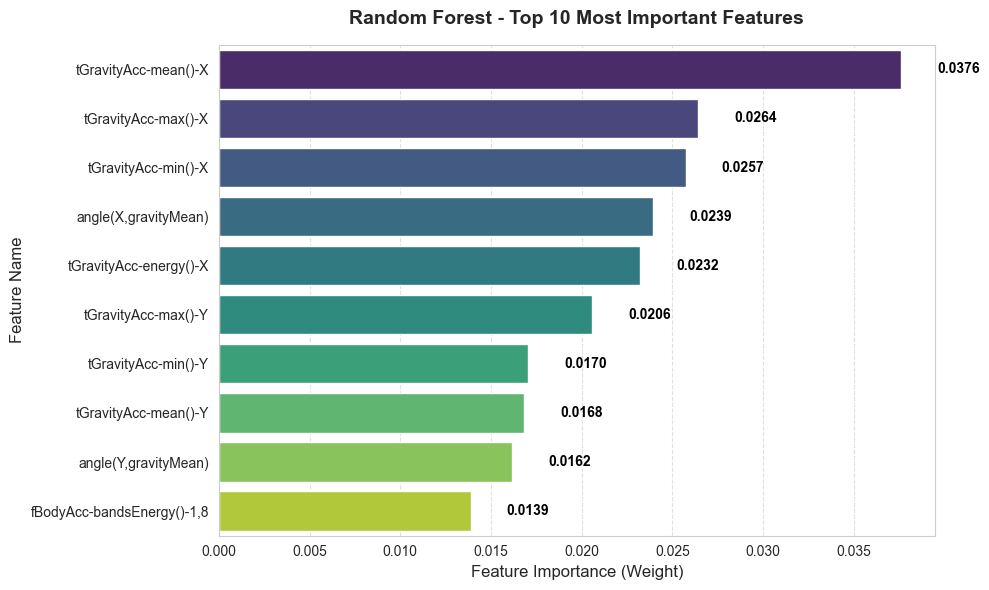

In [75]:
importances_rf = model_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
top_n = 10
top_features = X.columns[indices_rf][:top_n]
top_importances = importances_rf[indices_rf][:top_n]
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x=top_importances,y=top_features,palette="viridis",orient="h")
for i, v in enumerate(top_importances):
    plt.text(v + 0.002, i, f"{v:.4f}", color="black", va='center', fontweight='bold', fontsize=10)
plt.title("Random Forest - Top 10 Most Important Features", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Feature Importance (Weight)", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

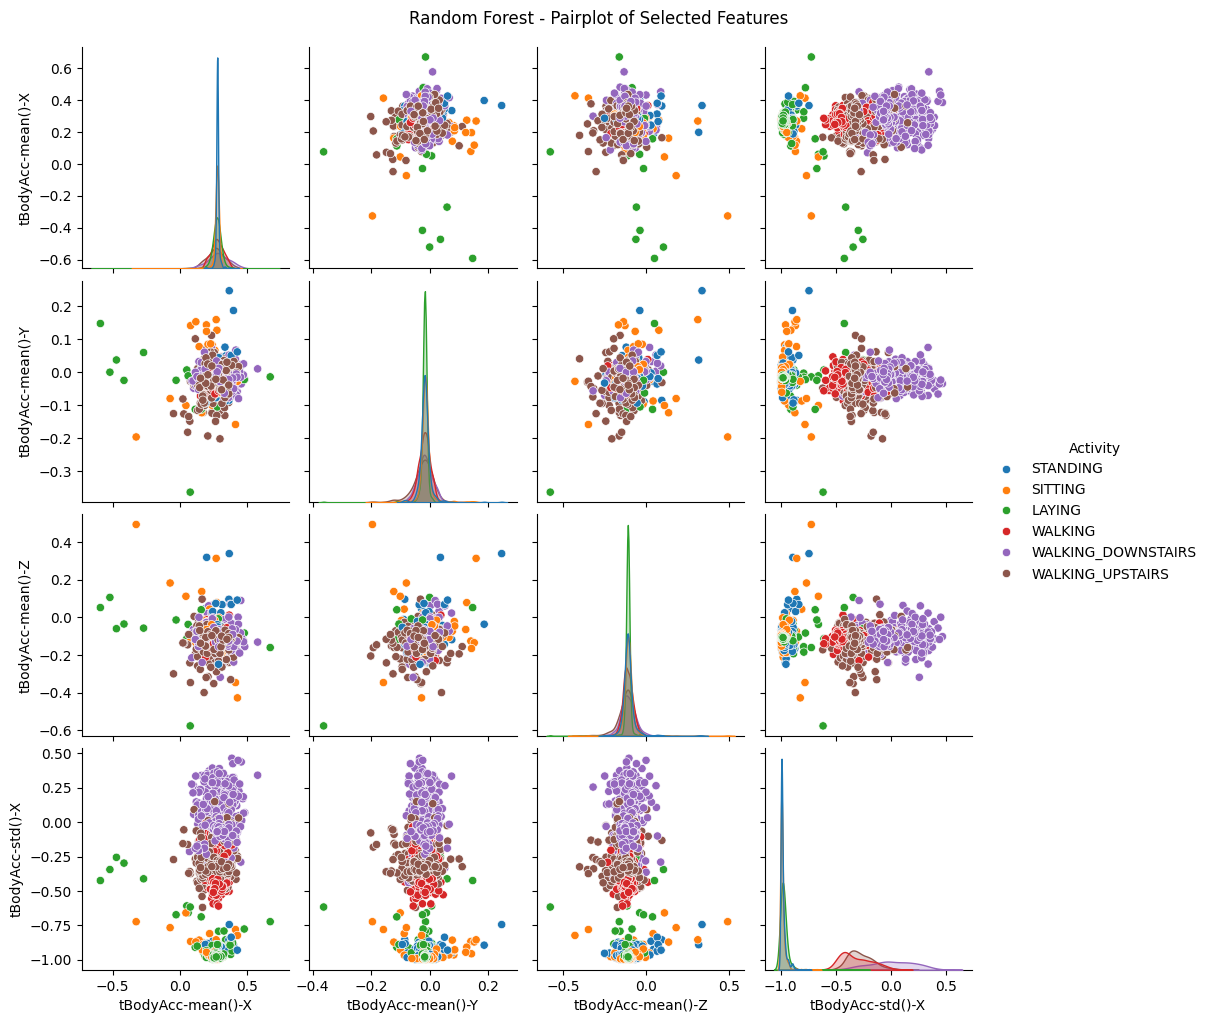

In [66]:
pairplot_cols = X.columns[:4].tolist() + [target_column]
pair_df = df[pairplot_cols]
sns.pairplot(pair_df, hue=target_column, diag_kind="kde")
plt.suptitle("Random Forest - Pairplot of Selected Features", y=1.02)
plt.show()

XGBOOST

In [76]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
print("Label Encoding Complete!")

Label Encoding Complete!


In [78]:
model_xgb = xgb.XGBClassifier(
    n_estimators=100,learning_rate=0.1,max_depth=3,subsample=0.8,colsample_bytree=0.8,random_state=42)
model_xgb.fit(X_train, y_train_encoded)
print("XGBoost Model Training Complete!")
y_pred_xgb = model_xgb.predict(X_test)
print("Predictions Generated!")

XGBoost Model Training Complete!
Predictions Generated!


In [ ]:
print("\nXGBOOST ACCURACY:", accuracy_score(y_test_encoded, y_pred_xgb))
print("\nXGBOOST CLASSIFICATION REPORT:\n", classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))


🎯 XGBOOST ACCURACY: 0.9887005649717514

📊 XGBOOST CLASSIFICATION REPORT:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       170
           SITTING       0.98      0.97      0.98       152
          STANDING       0.97      0.98      0.97       137
           WALKING       0.99      1.00      0.99       154
WALKING_DOWNSTAIRS       1.00      0.98      0.99       123
  WALKING_UPSTAIRS       0.99      0.99      0.99       149

          accuracy                           0.99       885
         macro avg       0.99      0.99      0.99       885
      weighted avg       0.99      0.99      0.99       885



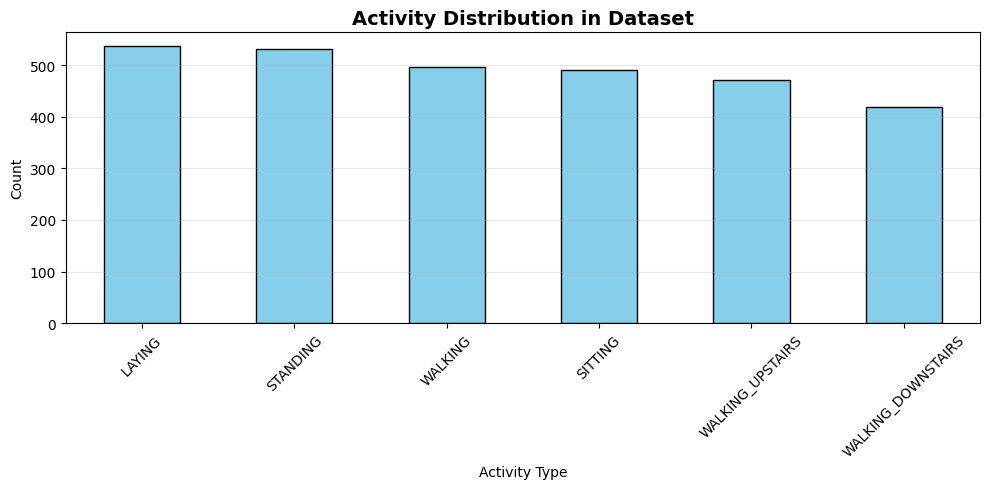

NameError: name 'y_pred' is not defined

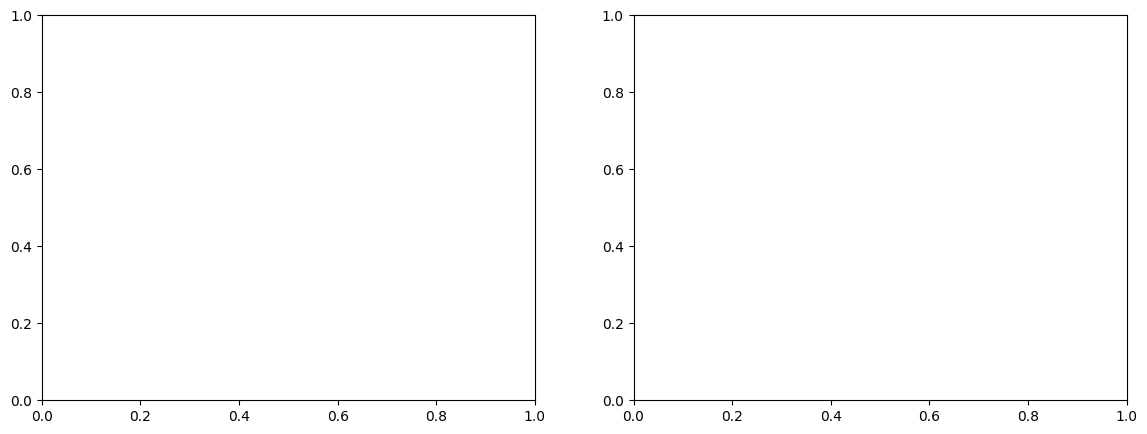

In [71]:

# Figure 1: Activity Distribution (Data Visualization)
plt.figure(figsize=(10, 5))
df['Activity'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Activity Distribution in Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Figure 2: Confusion Matrix (Regular + Normalized)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cm = confusion_matrix(y_test_encoded, y_pred)

# Regular Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", ax=axes[0],
            xticklabels=le.classes_, yticklabels=le.classes_)
axes[0].set_title("Confusion Matrix", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", ax=axes[1],
            xticklabels=le.classes_, yticklabels=le.classes_)
axes[1].set_title("Normalized Confusion Matrix", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Figure 3: Feature Importance (Top 15)
plt.figure(figsize=(10, 6))
feature_importance = model.feature_importances_
top_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False).head(15)

sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Most Important Features', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Figure 4: Per-Class Accuracy
plt.figure(figsize=(10, 5))
report_dict = classification_report(y_test_encoded, y_pred, 
                                    target_names=le.classes_, 
                                    output_dict=True)
activities = le.classes_
f1_scores = [report_dict[act]['f1-score'] for act in activities]

bars = plt.bar(activities, f1_scores, color='teal', alpha=0.7, edgecolor='black')
plt.title('F1-Score per Activity', fontsize=14, fontweight='bold')
plt.ylabel('F1-Score')
plt.ylim([0, 1.1])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Analysis Complete!")